In [1]:
# Import Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#reading data
raw_data = pd.read_csv("D:/USB-DS/E/Car_sales.csv")

In [3]:
raw_data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


### Preprocessing Data

In [4]:
#get the exploratory analysis
raw_data.describe(include="all")

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
count,157,157,157.000000,121.000000,157,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,157,155.000000
unique,30,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,NaN
top,Dodge,Neon,NaN,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/5/2012,NaN
freq,11,2,NaN,NaN,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
mean,NaN,NaN,52.998076,18.072975,NaN,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,NaN,77.043591
std,NaN,NaN,68.029422,11.453384,NaN,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,NaN,25.142664
min,NaN,NaN,0.110000,5.160000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,NaN,23.276272
25%,NaN,NaN,14.114000,11.260000,NaN,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,NaN,60.407707
50%,NaN,NaN,29.450000,14.180000,NaN,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,NaN,72.030917
75%,NaN,NaN,67.956000,19.875000,NaN,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,NaN,89.414878


Few key analysis:

Missing Values present, 
'Model' and 'Latest Launch' has 156 and 130 unique values, if we consider these columns then we will have more than 100 dummy variable

### Determining variables of interest

In [5]:
#lets drop the columns we do not require
df = raw_data.drop(['Model','Latest_Launch'], axis = 1)
df.describe(include="all")

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157,157.000000,121.000000,157,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
unique,30,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dodge,NaN,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11,NaN,NaN,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,52.998076,18.072975,NaN,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,NaN,68.029422,11.453384,NaN,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,NaN,0.110000,5.160000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,NaN,14.114000,11.260000,NaN,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,NaN,29.450000,14.180000,NaN,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,NaN,67.956000,19.875000,NaN,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878


#### Dealing with missing values

In [6]:
df.isnull().sum()

Manufacturer            0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Power_perf_factor       2
dtype: int64

In [7]:
new_data= df.dropna(axis=0)
new_data.describe(include="all")

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,117,117.000000,117.000000,117,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
unique,26,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ford,NaN,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,NaN,NaN,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,59.112316,18.031538,NaN,25.969487,3.048718,181.282051,107.326496,71.189744,187.717949,3.324051,17.812821,24.119658,74.930921
std,NaN,75.058933,11.605632,NaN,14.149699,1.055169,58.591786,8.050588,3.530151,13.849926,0.597177,3.794609,4.404470,25.771796
min,NaN,0.110000,5.160000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,NaN,16.767000,11.240000,NaN,16.980000,2.200000,140.000000,102.400000,68.500000,177.500000,2.911000,15.300000,22.000000,55.297117
50%,NaN,32.299000,14.010000,NaN,21.665000,3.000000,175.000000,107.000000,70.400000,187.800000,3.340000,17.200000,24.000000,70.660942
75%,NaN,76.029000,19.875000,NaN,29.465000,3.800000,210.000000,111.600000,73.600000,196.500000,3.823000,19.800000,26.000000,85.828408


#### Exploring the PDF (Probability Distribution Function)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

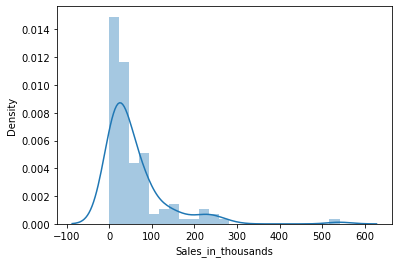

In [8]:
#for Sales_in_thousands
sns.distplot(new_data['Sales_in_thousands'])

#### Dealing with Outliers

In [9]:
q = new_data['Sales_in_thousands'].quantile(0.99)
data_1 = new_data[new_data['Sales_in_thousands']<q]
data_1.describe(include="all")

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,115,115.000000,115.000000,115,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
unique,26,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dodge,NaN,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,NaN,NaN,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,53.033330,18.069348,NaN,25.909261,3.026957,180.695652,107.018261,71.129565,187.372174,3.311278,17.721739,24.217391,74.694611
std,NaN,56.979408,11.702931,NaN,14.261944,1.050424,58.927874,7.560987,3.481303,13.532161,0.593855,3.753449,4.378541,25.933160
min,NaN,0.110000,5.160000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,NaN,15.728500,11.232500,NaN,16.934000,2.200000,140.000000,102.400000,68.500000,177.450000,2.910500,15.300000,22.000000,54.943581
50%,NaN,31.148000,13.890000,NaN,21.620000,3.000000,173.000000,107.000000,70.400000,186.600000,3.332000,17.200000,24.000000,70.389737
75%,NaN,72.194500,19.882500,NaN,29.382000,3.800000,210.000000,111.450000,73.550000,196.350000,3.774000,19.300000,26.000000,85.064795


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Horsepower', ylabel='Density'>

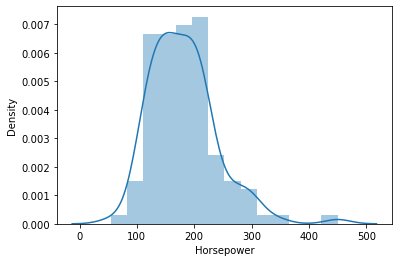

In [10]:
#for horsepower
sns.distplot(new_data['Horsepower'])

In [11]:
q = data_1['Horsepower'].quantile(0.99)
data_2 = data_1[data_1['Horsepower']<q]
data_2.describe(include="all")

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,113,113.000000,113.000000,113,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
unique,26,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ford,NaN,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,53.805044,17.551150,NaN,25.346327,2.959292,176.858407,107.136283,71.067257,187.534513,3.311611,17.698230,24.309735,73.102609
std,NaN,57.173285,11.028006,NaN,13.640946,0.913161,51.293948,7.554718,3.477207,13.594864,0.599027,3.782572,4.342645,22.970459
min,NaN,0.110000,5.160000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,NaN,16.767000,11.225000,NaN,16.888000,2.200000,140.000000,102.400000,68.500000,177.500000,2.910000,15.300000,22.000000,54.590045
50%,NaN,32.299000,13.880000,NaN,21.610000,3.000000,170.000000,107.000000,70.400000,187.800000,3.332000,17.100000,24.000000,70.078322
75%,NaN,73.203000,19.690000,NaN,28.400000,3.500000,205.000000,111.500000,73.100000,196.500000,3.778000,19.500000,26.000000,84.830779


In [12]:
data_cleaned = data_2.reset_index(drop=True)
data_cleaned.describe(include="all")

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,113,113.000000,113.000000,113,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
unique,26,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ford,NaN,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,53.805044,17.551150,NaN,25.346327,2.959292,176.858407,107.136283,71.067257,187.534513,3.311611,17.698230,24.309735,73.102609
std,NaN,57.173285,11.028006,NaN,13.640946,0.913161,51.293948,7.554718,3.477207,13.594864,0.599027,3.782572,4.342645,22.970459
min,NaN,0.110000,5.160000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,NaN,16.767000,11.225000,NaN,16.888000,2.200000,140.000000,102.400000,68.500000,177.500000,2.910000,15.300000,22.000000,54.590045
50%,NaN,32.299000,13.880000,NaN,21.610000,3.000000,170.000000,107.000000,70.400000,187.800000,3.332000,17.100000,24.000000,70.078322
75%,NaN,73.203000,19.690000,NaN,28.400000,3.500000,205.000000,111.500000,73.100000,196.500000,3.778000,19.500000,26.000000,84.830779


Overall we have deleted 24 observations during preprocessing

In [13]:
data_cleaned.columns.values

array(['Manufacturer', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor'], dtype=object)

In [14]:
data_cleaned.corr()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.329820,-0.341010,-0.044482,-0.252645,0.241877,0.097021,0.153949,-0.057733,0.017018,0.037692,-0.278122
__year_resale_value,-0.329820,1.000000,0.951786,0.444622,0.742666,0.000783,0.148009,0.069546,0.398541,0.344084,-0.374861,0.809211
Price_in_thousands,-0.341010,0.951786,1.000000,0.603444,0.849451,0.117792,0.280566,0.227489,0.542225,0.418820,-0.455161,0.906241
Engine_size,-0.044482,0.444622,0.603444,1.000000,0.816339,0.533574,0.700083,0.665260,0.853236,0.676530,-0.740026,0.793353
Horsepower,-0.252645,0.742666,0.849451,0.816339,1.000000,0.331527,0.511881,0.517484,0.690720,0.525222,-0.594394,0.992864
Wheelbase,0.241877,0.000783,0.117792,0.533574,0.331527,1.000000,0.693066,0.846109,0.682268,0.658528,-0.493864,0.294356
Width,0.097021,0.148009,0.280566,0.700083,0.511881,0.693066,1.000000,0.754311,0.742161,0.665240,-0.587592,0.475815
Length,0.153949,0.069546,0.227489,0.665260,0.517484,0.846109,0.754311,1.000000,0.680359,0.550874,-0.477511,0.467721
Curb_weight,-0.057733,0.398541,0.542225,0.853236,0.690720,0.682268,0.742161,0.680359,1.000000,0.844795,-0.827013,0.678593
Fuel_capacity,0.017018,0.344084,0.418820,0.676530,0.525222,0.658528,0.665240,0.550874,0.844795,1.000000,-0.810836,0.517779


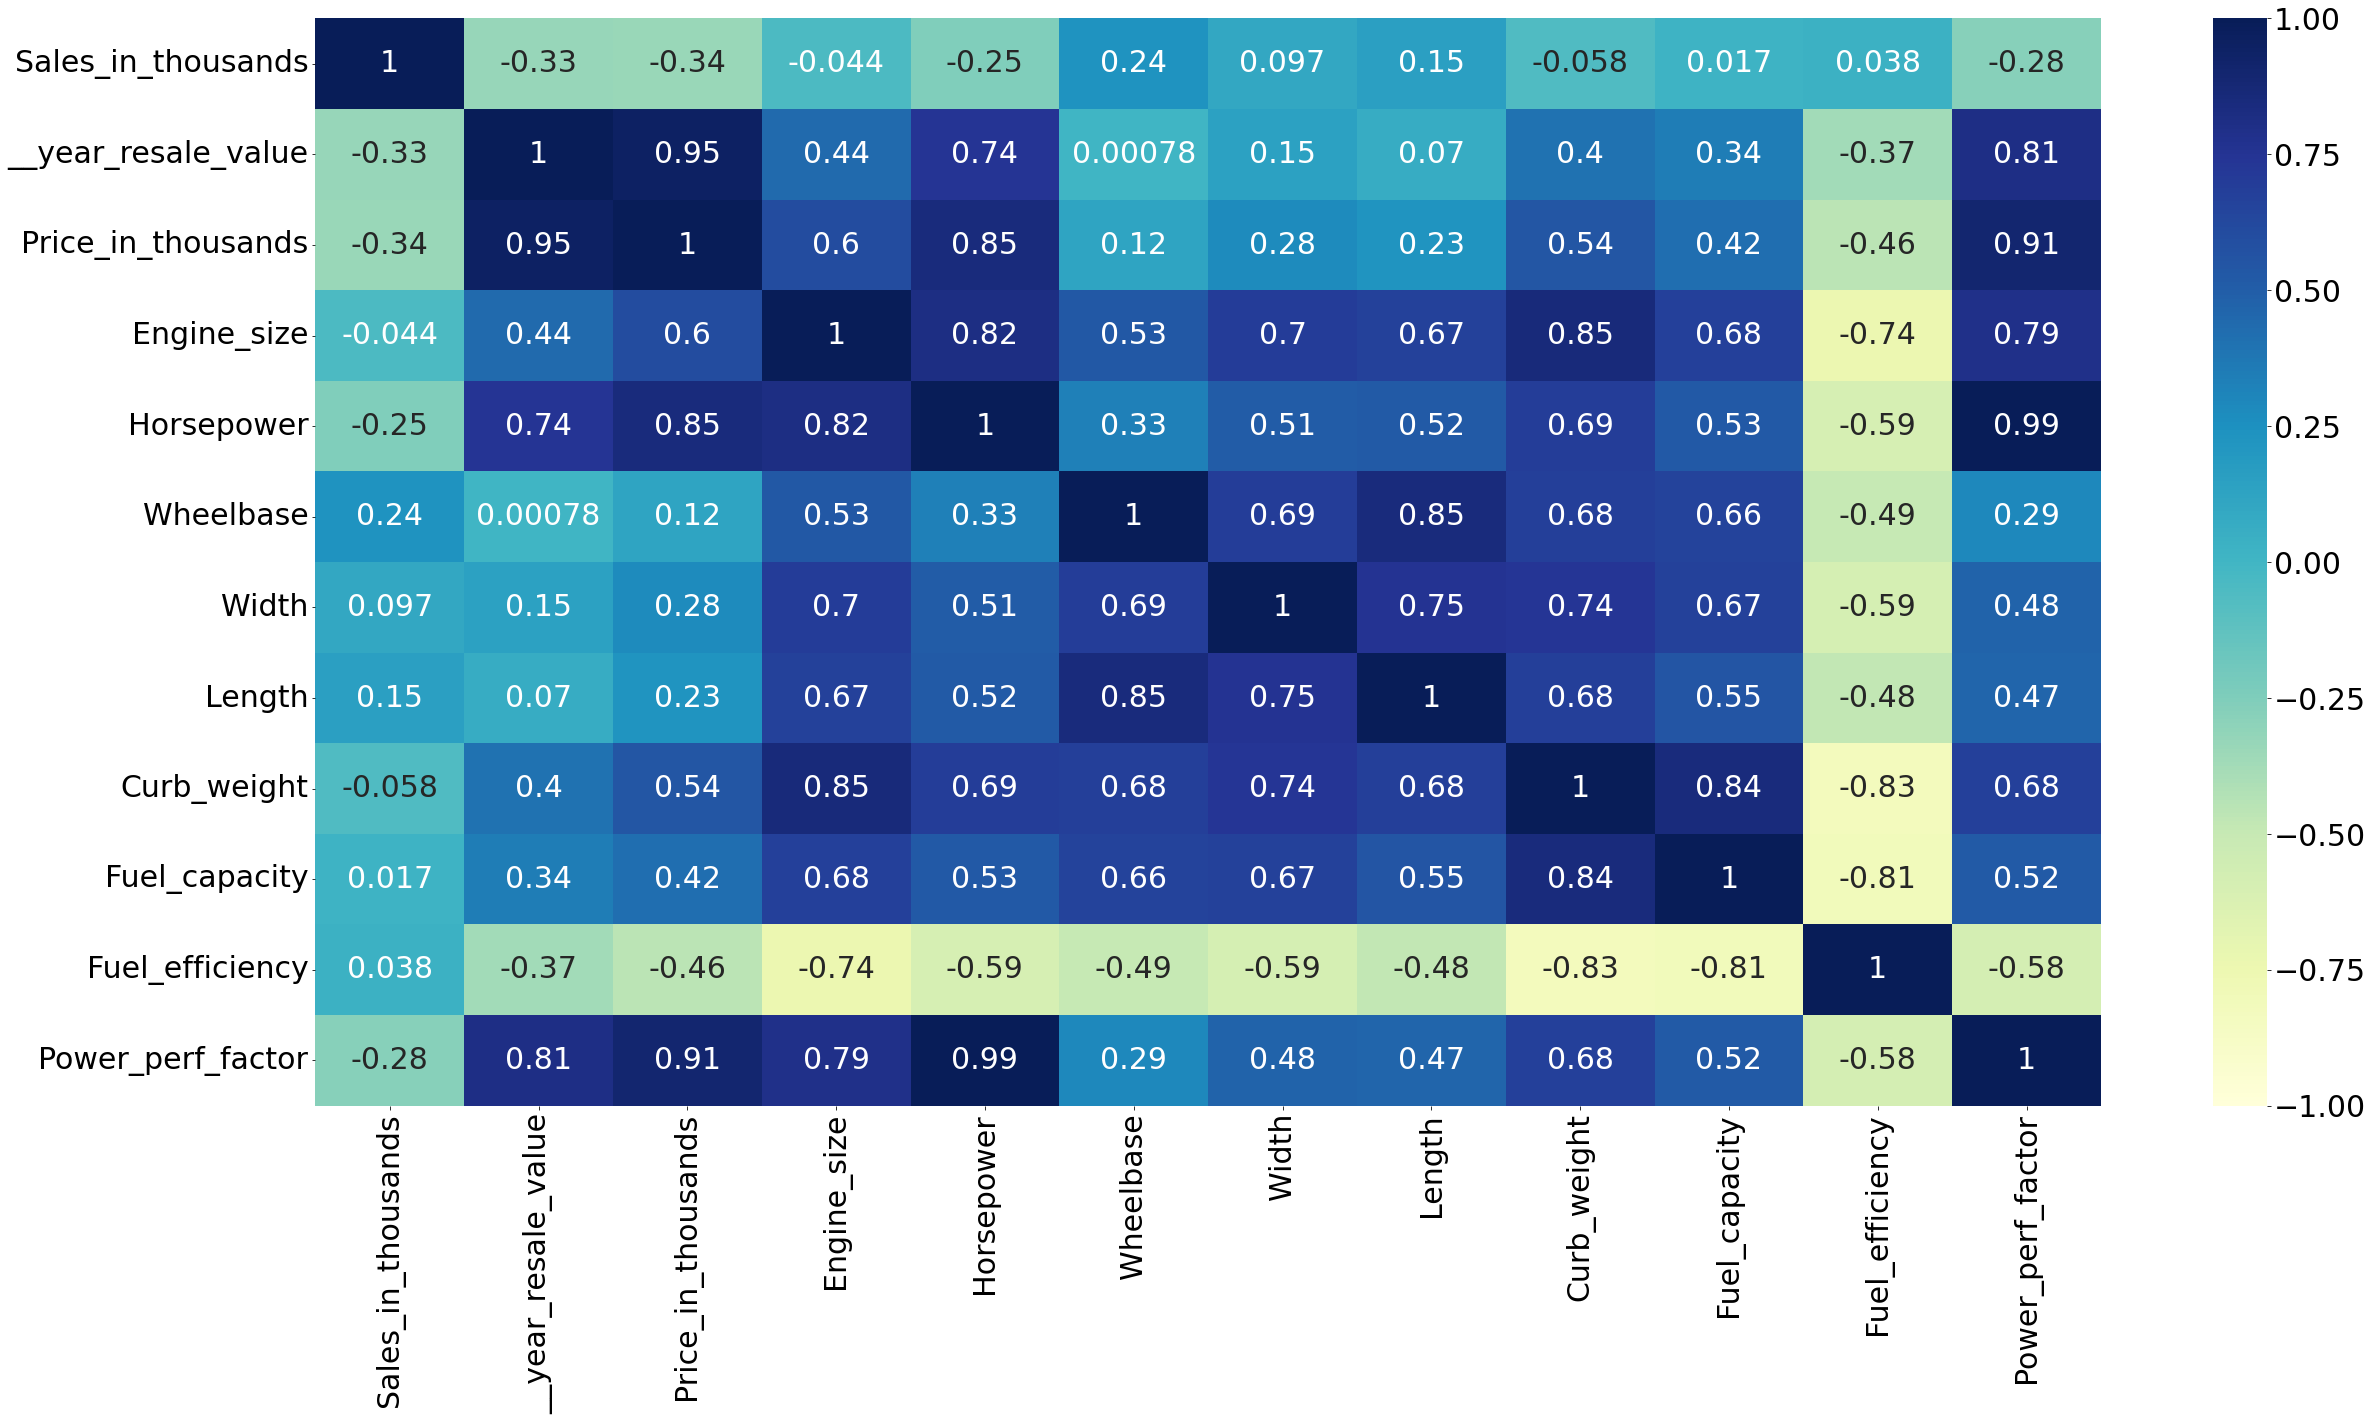

In [15]:
#Visualizing the same in Heatmap()
plt.figure(figsize=(40,20))
plt.rcParams.update({'font.size': 30})
sns.heatmap(data_cleaned.corr(), annot = True, vmin = -1, vmax = 1, cmap="YlGnBu")
plt.show()

In [16]:
data_with_no_collinear = data_cleaned.drop(['Horsepower','Fuel_capacity','Power_perf_factor','Wheelbase', 'Width', 'Length', 'Curb_weight'],axis=1)
data_with_no_collinear.head()

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Fuel_efficiency
0,Acura,16.919,16.360,Passenger,21.50,1.8,28.0
1,Acura,39.384,19.875,Passenger,28.40,3.2,25.0
2,Acura,8.588,29.725,Passenger,42.00,3.5,22.0
3,Audi,20.397,22.255,Passenger,23.99,1.8,27.0
4,Audi,18.780,23.555,Passenger,33.95,2.8,22.0


In [17]:
data_with_dummies = pd.get_dummies(data_with_no_collinear, drop_first=True)
data_with_dummies.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Fuel_efficiency,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saturn,Manufacturer_Toyota,Manufacturer_Volkswagen,Vehicle_type_Passenger
0,16.919,16.360,21.50,1.8,28.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.40,3.2,25.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,8.588,29.725,42.00,3.5,22.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,20.397,22.255,23.99,1.8,27.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,18.780,23.555,33.95,2.8,22.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
data_with_dummies.columns.values

array(['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Fuel_efficiency', 'Manufacturer_Audi',
       'Manufacturer_BMW', 'Manufacturer_Buick', 'Manufacturer_Cadillac',
       'Manufacturer_Chevrolet', 'Manufacturer_Chrysler',
       'Manufacturer_Dodge', 'Manufacturer_Ford', 'Manufacturer_Honda',
       'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jeep', 'Manufacturer_Lexus', 'Manufacturer_Lincoln',
       'Manufacturer_Mercedes-B', 'Manufacturer_Mercury',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Oldsmobile', 'Manufacturer_Plymouth',
       'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saturn', 'Manufacturer_Toyota',
       'Manufacturer_Volkswagen', 'Vehicle_type_Passenger'], dtype=object)

#### Rearrange the data a bit

In [19]:
cols = ['Price_in_thousands','Sales_in_thousands', '__year_resale_value',
       'Engine_size', 'Fuel_efficiency', 'Manufacturer_Audi',
       'Manufacturer_BMW', 'Manufacturer_Buick', 'Manufacturer_Cadillac',
       'Manufacturer_Chevrolet', 'Manufacturer_Chrysler',
       'Manufacturer_Dodge', 'Manufacturer_Ford', 'Manufacturer_Honda',
       'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jeep', 'Manufacturer_Lexus', 'Manufacturer_Lincoln',
       'Manufacturer_Mercedes-B', 'Manufacturer_Mercury',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Oldsmobile', 'Manufacturer_Plymouth',
       'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saturn', 'Manufacturer_Toyota',
       'Manufacturer_Volkswagen', 'Vehicle_type_Passenger']

In [20]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed

,Price_in_thousands,Sales_in_thousands,__year_resale_value,Engine_size,Fuel_efficiency,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saturn,Manufacturer_Toyota,Manufacturer_Volkswagen,Vehicle_type_Passenger
0,21.50,16.919,16.360,1.8,28.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,28.40,39.384,19.875,3.2,25.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,42.00,8.588,29.725,3.5,22.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,23.99,20.397,22.255,1.8,27.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,33.95,18.780,23.555,2.8,22.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,14.90,9.761,11.425,2.0,26.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
109,16.70,83.721,13.240,2.0,26.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
110,21.20,51.102,16.725,1.8,27.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
111,19.99,9.569,16.575,2.0,26.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


#### Linear Regression Model

Declare input and target variable

In [21]:
targets = data_preprocessed['Price_in_thousands']
inputs = data_preprocessed.drop(['Price_in_thousands'],axis = 1)

Scale the data

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(inputs)

StandardScaler()

In [23]:
input_scaled = sc.transform(inputs)

Train and Test Split

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(input_scaled,targets,test_size = 0.2, random_state=42)

Create the regression

In [25]:
#fit the model for training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
#predict the values for the training dataset
y_predict = model.predict(x_train)

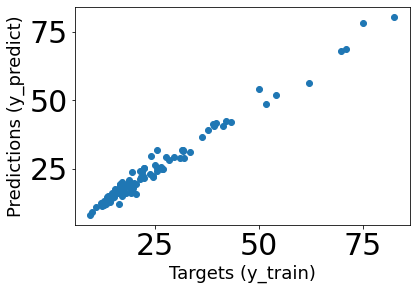

In [27]:
plt.scatter(y_train,y_predict)
plt.xlabel("Targets (y_train)", size = 18)
plt.ylabel("Predictions (y_predict)", size = 18)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

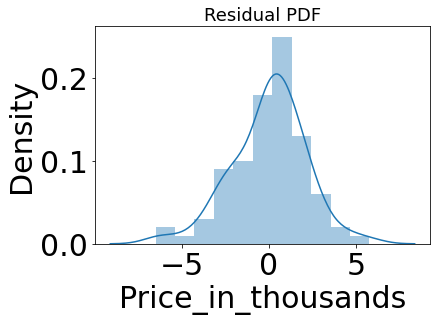

In [28]:
#draw the residual plot
sns.distplot(y_train - y_predict)
plt.title("Residual PDF", size = 18)

In [29]:
model.score(x_train, y_train)

0.9796747186171311

Our model is explaining almost 98% of variablity of the training data

Testing the model

In [30]:
#predict the values for the testing dataset
y_hat_test = model.predict(x_test)

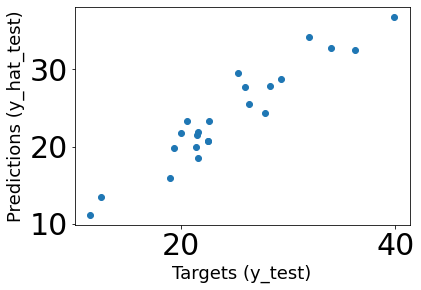

In [31]:
plt.scatter(y_test,y_hat_test)
plt.xlabel("Targets (y_test)", size = 18)
plt.ylabel("Predictions (y_hat_test)", size = 18)
plt.show()

Check the performance of the model

In [32]:
df_pf = pd.DataFrame(y_hat_test,columns=['Predicted Sale Price'])
df_pf.head()

,Predicted Sale Price
0,25.472537
1,32.788965
2,19.992769
3,15.971833
4,34.199863


In [33]:
y_test = y_test.reset_index(drop=True)
df_pf['Actual Sale Price'] = y_test
df_pf

,Predicted Sale Price,Actual Sale Price
0,25.472537,26.399
1,32.788965,33.950
2,19.992769,21.410
3,15.971833,19.035
4,34.199863,31.965
5,23.297025,20.550
6,23.272298,22.605
7,20.687467,22.527
8,27.670006,26.000
9,24.344289,27.885
